In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from IPython.display import HTML

In [3]:
hbar = 1.0          # Reduced Planck constant
m = 1.0             # Electron mass
e = 1.0             # Elementary charge

In [4]:
def psi(x, t, k0, sigma, x0):
    x_center = x0 + k0 * t
    envelope = np.exp(-(x - x_center)**2 / (2 * sigma**2))
    phase = np.exp(1j * (k0 * x - (k0**2) * t / 2))
    return envelope * phase

In [5]:
x=np.linspace(0, 100, 1000)
time=np.linspace(0, 10, 100)
barrier_start = 25.5
barrier_end = 26.5
V0 = 10.0
V = np.zeros_like(x)
barrier_mask = (x >= barrier_start) & (x <= barrier_end)
V[barrier_mask] = V0
dx = x[1] - x[0]
dt = time[1] - time[0]
N=len(x)

r = hbar * dt / (4 * m * dx**2)
s = dt / (2 * hbar) * V  # potential term array


diag_A = 1 + 2j * r + 1j * s
off_diag_A = -1j * r * np.ones(N-1)

diag_B = 1 - 2j * r - 1j * s
off_diag_B = 1j * r * np.ones(N-1)

A = diags([off_diag_A, diag_A, off_diag_A], offsets=[-1, 0, 1],format='csr')
B = diags([off_diag_B, diag_B, off_diag_B], offsets=[-1, 0, 1],format='csr')

In [6]:
k0 = 5.0
sigma = 2.0
x0 = 5.0
psi_t=psi(x, 0, k0, sigma, x0)
wave=[]
for i in range(1, len(time)+1):
    psi_t = psi_t / np.sqrt(np.sum(np.abs(psi_t)**2) * dx)
    wave.append(psi_t)
    b = B.dot(psi_t)
    psi_t = spsolve(A, b)  
len(wave)

100

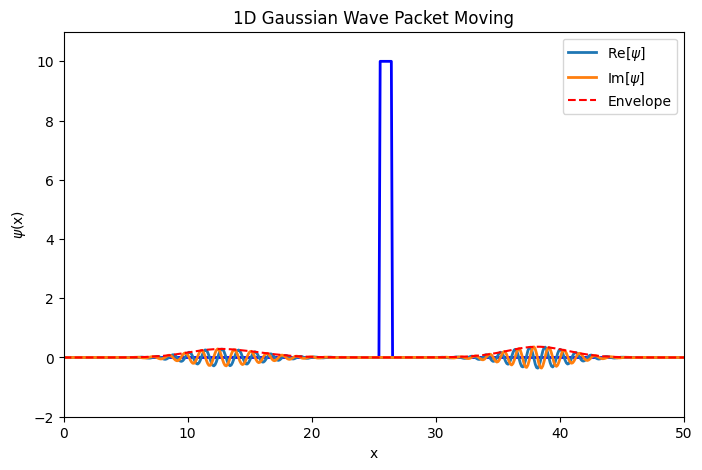

In [7]:
fig2, ax2 = plt.subplots(figsize=(8, 5))
line, = ax2.plot(x, V, 'b-', lw=2)
line_real, = ax2.plot([], [], label='Re[$\\psi$]', lw=2)
line_imag, = ax2.plot([], [], label='Im[$\\psi$]', lw=2)
line_env, = ax2.plot([], [], 'r--', label='Envelope')
ax2.set_xlim(0, 50)
ax2.set_ylim(-2, 11)
ax2.set_xlabel('x')
ax2.set_ylabel('$\\psi$(x)')
ax2.set_title('1D Gaussian Wave Packet Moving')
ax2.legend()
def init():
    line_real.set_data([], [])
    line_imag.set_data([], [])
    line_env.set_data([], [])
    return line_real, line_imag, line_env

def animate(i):
    t = i * dt
    wave_function = wave[i]
    line_real.set_data(x, np.real(wave_function))
    line_imag.set_data(x, np.imag(wave_function))
    line_env.set_data(x, abs(wave_function))
    
    return line_real, line_imag, line_env

anim1 = animation.FuncAnimation(fig2, animate, init_func=init,
                               frames=len(time), interval=60, blit=True)

HTML(anim1.to_jshtml())